# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [21]:
import pandas as pd

train = pd.read_csv('Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


<h3> Q.1. Replace missing values in the dataset by the mean</h3>

In [22]:
for k in train.keys():
    if train[k].isna().sum() > 0:
        train[k].fillna(train[k].mean(), inplace=True)

<h3> Q.2. Graph a scatter plot to visualize the relationship between Hits and Salary</h3>

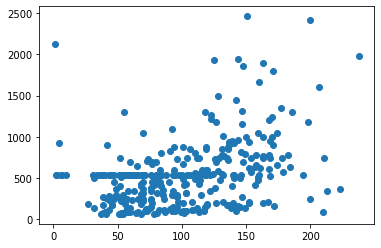

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=train['Hits'], y=train['Salary'])
plt.show()

<h3> Q.3. Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.
</h3>

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# TODO: Split the data into 70/30 train/test datasets
X = np.array(train["Hits"]).reshape((-1, 1))
y = train["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TODO: Fit linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# TODO: print the slope and intercept
print("Slope:", lin_model.coef_)
print("Intercept:", lin_model.intercept_)

Slope: [2.67265151]
Intercept: 258.3617421213528


<h3> Q.4. Compute the RMSE of the model obtained above</h3>

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#TODO
y_pred = lin_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

414.4855851467615


<h3> Q.5. Graph the linear regression model obtained on the data</h3>

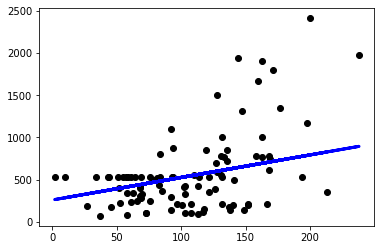

In [27]:
# TODO: Plot outputs
plt.scatter(x=X_test, y=y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

<h3> Q.6. Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.
</h3>

[ 2.06714107e-02 -1.68855257e+00  4.43517426e+02]
397.58138241995215


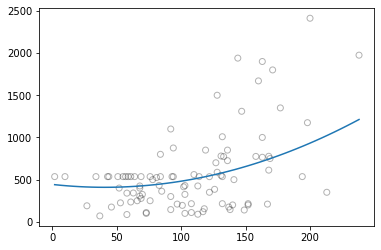

In [69]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Generate weights for polynomial function with degree 2
X_train = X_train.reshape(1, -1) # reshaping the data for the polyfit
X_train = X_train[0, :]
weights = np.polyfit(x=X_train, y=y_train, deg=2)
print(weights)

# # Generate model with the given weights
poly_model = np.poly1d(weights)

# # Prediction on test set
test_x = X_test.reshape(-1,1)
y_pred = poly_model(test_x)

# # TODO: Compute the RMSE
rms = sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(rms)
#
# # TODO: Plot the visualisation
poly_regr = np.linspace(test_x.min(),test_x.max())
plot = poly_model(poly_regr)

plt.scatter(test_x, y_test, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(poly_regr, plot)
plt.show()

<h3> Q.7. Create a cubic spline with 3 knots at 40, 100 and 150</h3>

In [ ]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate a cubic spline with 3 knots at 25, 40 and 60
transformed_x = #TODO

# Fit a generalized linear models on the transformed dataset
fit_glm = #TODO

# Prediction
pred_glm = #TODO

# TODO: Compute the RMSE 

# TODO: Plot the visualisation

<h3> Q.8. Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'</h3>

In [ ]:
# Generate natural cubic spline
transformed_x = # TODO
fit_spline = # TODO

# TODO: Compute the RMSE 

# Visualization

# TODO: Plot the visualisation

<h3> Q.9. Which model performed the best?</h3>

<h3><h3> Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Enter summary here